In [1]:
!pip install prettytable

In [2]:
from prettytable import PrettyTable
import itertools
import time
import math

In [3]:
mytable = PrettyTable()
table, city = [], []

number = int(input('Введите количество городов: '))
print('Если пути между городами нет, введите 0')

mytable.field_names = [''] + ['Город ' + str(i) for i in range(1, number+1)]

def check_input():
    try:
        city = list(map(int, input(f'Введите стоимость путей для города {str(i + 1)}: ').split()))
        assert len(city) == number
    except (ValueError, AssertionError):
        print(f'Значения стоимостей путей для города {str(i + 1)} введены некорректно, повторите снова')
        return check_input()
    else:
        return city

for i in range(number):
    city = check_input()
    city[i] = chr(10007)
    city = [i if i!=0 else math.inf for i in city]
    mytable.add_row(['Город ' + str(i + 1)] + [i if i!=math.inf else chr(10007) for i in city])
    table.append(city)

print(mytable)

Введите количество городов: 5
Если пути между городами нет, введите 0
Введите стоимость путей для города 1: 0 3 4 5 0
Введите стоимость путей для города 2: 4 0 5 6 1
Введите стоимость путей для города 3: 3 0 0 1 4
Введите стоимость путей для города 4: 3 4 5 0 7
Введите стоимость путей для города 5: 4 4 3 1 0
+---------+---------+---------+---------+---------+---------+
|         | Город 1 | Город 2 | Город 3 | Город 4 | Город 5 |
+---------+---------+---------+---------+---------+---------+
| Город 1 |    ✗    |    3    |    4    |    5    |    ✗    |
| Город 2 |    4    |    ✗    |    5    |    6    |    1    |
| Город 3 |    3    |    ✗    |    ✗    |    1    |    4    |
| Город 4 |    3    |    4    |    5    |    ✗    |    7    |
| Город 5 |    4    |    4    |    3    |    1    |    ✗    |
+---------+---------+---------+---------+---------+---------+


In [4]:
first_city = 0
city_list = list(range(number))

def Bellman(cities, table):
    main = cities.pop(0)
    if len(cities) == 1:
        return list((table[main][cities[0]] + table[cities[0]][first_city], list((main, cities[0], first_city))))
    else:
        list_of_fn, list_of_ways = [], []
        for i in cities:
            cities_rec = list(cities)
            cities_rec.remove(i)
            cities_rec = [i] + cities_rec
            fn = Bellman(cities_rec, table)
            list_of_fn.append(table[main][i] + fn[0])
            list_of_ways.append([main] + fn[1])
        if min(list_of_fn) != math.inf: 
            return list((min(list_of_fn), list_of_ways[list_of_fn.index(min(list_of_fn))]))
        else:
            return False

In [5]:
def The_full_search_method(cities, table, printer=True):
    all_ways = [list(i) + [list(i)[0]] for i in itertools.permutations(cities)]
    list_of_way_costs = []
    for i in all_ways:
        cost = 0
        for j in range(len(i) - 1):
            cost += table[i[j]][i[j+1]]
        list_of_way_costs.append(cost)
        
    best_way = list(map(lambda x: str(x + 1), all_ways[list_of_way_costs.index(min(list_of_way_costs))]))
    if min(list_of_way_costs) != math.inf:
        if printer:
            print(f'Самый короткий маршрут [{" -> ".join(best_way)}], его длина: {min(list_of_way_costs)}')
        return list(zip(best_way[:-1], best_way[1:]))
    else:
        if printer:
            print('Ошибка: маршрут построить невозможно')
        return False

In [6]:
tic_1 = time.perf_counter()
best_way = The_full_search_method(city_list, table, printer=True)
toc_1 = time.perf_counter()
if best_way:
    print(f"Вычисление методом полного перебора заняло {toc_1 - tic_1:0.10f} секунд\n")

Самый короткий маршрут [1 -> 2 -> 5 -> 3 -> 4 -> 1], его длина: 11
Вычисление методом полного перебора заняло 0.0005832000 секунд



In [7]:
tic_2 = time.perf_counter()
Ans = Bellman(city_list, table)
if Ans:
    print(f'Самый короткий маршрут [{" -> ".join(list(map(lambda x: str(x + 1), Ans[1])))}], его длина: {Ans[0]}')
    toc_2 = time.perf_counter()
    print(f"Вычисление методом динамического программирования заняло {toc_2 - tic_2:0.10f} секунд")
    print(f"\nМетод динамического программирования быстрее обычного перебора в {((toc_1 - tic_1) / (toc_2 - tic_2)):0.10f} раз")
else:
    print('Ошибка: маршрут построить невозможно')

Самый короткий маршрут [1 -> 2 -> 5 -> 3 -> 4 -> 1], его длина: 11
Вычисление методом динамического программирования заняло 0.0004811000 секунд

Метод динамического программирования быстрее обычного перебора в 1.2122219913 раз


In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from functools import reduce

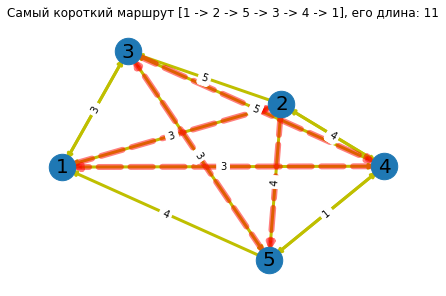

In [9]:
if Ans:
    G = nx.DiGraph()

    # Преобразование матрицы в список списков вида [вершина_1, вершина_2, длина]
    edges_list = [[(str(i+1), str(j+1), table[i][j]) for i in range(number) if type(table[i][j]) != str and table[i][j]!= math.inf ] 
                  for j in range(number)]
    edges_list = reduce(lambda x, y: x + y, edges_list)
    G.add_weighted_edges_from(edges_list)

    e_simple = [(u, v) for (u, v, d) in G.edges(data=True) if (u, v) not in best_way]
    e_best = [(u, v) for (u, v, d) in G.edges(data=True) if (u, v) in best_way]

    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=e_simple, edge_color="y", width=3)
    nx.draw_networkx_edges(
        G, pos, edgelist=e_best, width=6, alpha=0.5, edge_color="r", style="dashed")

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title(f'Самый короткий маршрут [{" -> ".join(list(map(lambda x: str(x + 1), Ans[1])))}], его длина: {Ans[0]}')
    plt.show()

In [10]:
!pip install graphviz

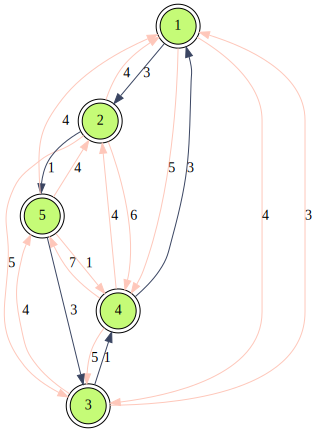

In [11]:
g='Невозможно построить график'
if Ans: 
    import numpy as np
    from graphviz import Digraph

    new_table = [row[1:] for row in mytable.rows]
    adjmatrix = np.array(new_table)
    N = adjmatrix.shape[0]
    M = adjmatrix.shape[1]
    g = Digraph(comment='FromMatrix')
    g.attr('node', shape='doublecircle')

    for i in range(N):
        g.node(str(i+1), str(i+1), style='filled', fillcolor='#c5fb77')
        for j in range(M):
            if adjmatrix[i][j] not in [chr(10007), 'inf']:
                g.edge(str(i+1), str(j+1), label=str(adjmatrix[i][j]), color = ('#3a4562' if (str(i+1), str(j+1)) in best_way else '#fec7ba'))

g

In [12]:
import matplotlib.pyplot as plt
import random

In [13]:
times_full = []
times_dyn = []
for num_cities in range(2, 11):
    city_list = list(range(num_cities))
    table = [[random.randint(0, 30) for i in range(num_cities)] for i in range(num_cities)]
    
    tic_1 = time.perf_counter()
    best_way = The_full_search_method(city_list, table, printer=False)
    toc_1 = time.perf_counter()
    
    tic_2 = time.perf_counter()
    Ans = Bellman(city_list, table)
    toc_2 = time.perf_counter()
    
    times_full.append(toc_1 - tic_1)
    times_dyn.append(toc_2 - tic_2)   

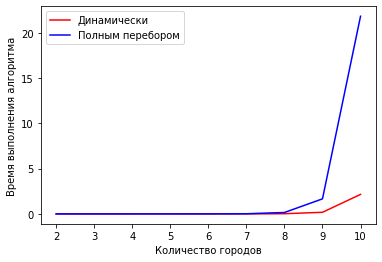

In [14]:
plt.plot(range(2, 11), times_dyn, '-r',  label='Динамически')
plt.plot(range(2, 11), times_full, '-b', label='Полным перебором')
plt.xlabel('Количество городов')
plt.ylabel('Время выполнения алгоритма')
plt.legend()
plt.show()